# COMP309 - a2
### Elliott Rose
### 300540768

In [15]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [11]:
# Loading the data into panda dataframe
df = pd.read_csv('House_Price.csv')

### Part 1: Business and Data Understanding [40 marks]
#### 1. (a)

In [7]:
# Number of instances (rows) and features (columns)
num_instances = df.shape[0]
num_features = df.shape[1]

# Categorical and numerical features
cat_features = df.select_dtypes(include=['object']).columns
num_features = df.select_dtypes(exclude=['object']).columns

num_cat_features = len(cat_features)
num_num_features = len(num_features)

# Summary
print(f"Number of instances: {num_instances}")
print(f"Number of features: {num_features}")
print(f"Categorical features: {num_cat_features}")
print(f"Numerical features: {num_num_features}")

Number of instances: 1460
Number of features: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical features: 43
Numerical features: 38


#### 1. (b)

In [8]:
# Pearson correlation with SalePrice
correlation = df.corr()['SalePrice'].sort_values(ascending=False)

# Top 5 features
top_5_features = correlation.index[1:6]
correlation_values = correlation[1:6]

print("Top 5 Numerical Features Correlated with SalePrice:")
print(correlation_values)

Top 5 Numerical Features Correlated with SalePrice:
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64


#### 1. (c)

The number of bins can be determined using the square root of the number of observations or using Sturges' formula.

Skewness indicates the asymmetry of the distribution. Positive skew indicates a tail on the right, negative skew on the left.

Kurtosis indicates the "tailedness" of the distribution. High kurtosis means more data is in the tails. 

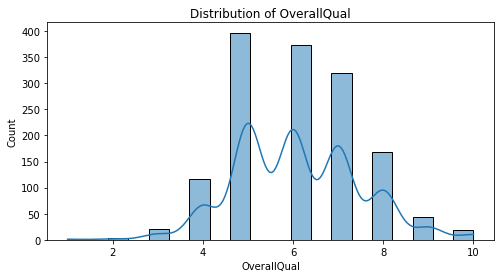

OverallQual - Skewness: 0.2167209765258641, Kurtosis: 0.091856548449611


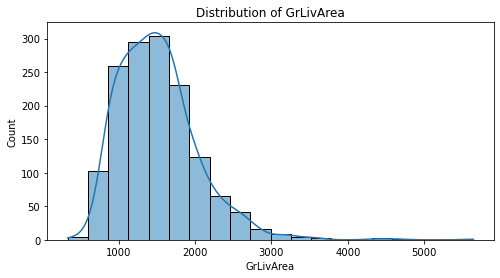

GrLivArea - Skewness: 1.365155954773434, Kurtosis: 4.874265760253215


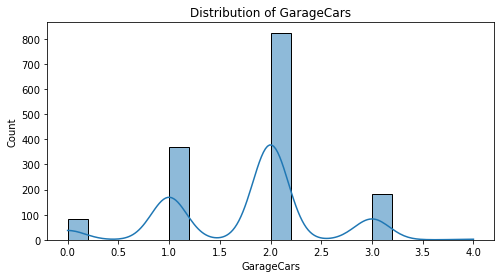

GarageCars - Skewness: -0.34219689543081294, Kurtosis: 0.2161348715110729


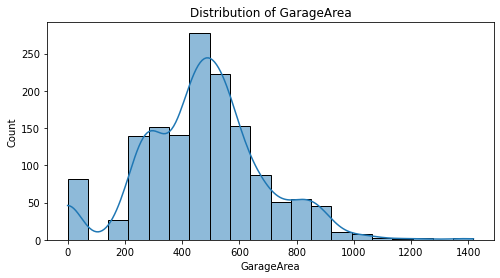

GarageArea - Skewness: 0.1797959420587727, Kurtosis: 0.9098227950882034


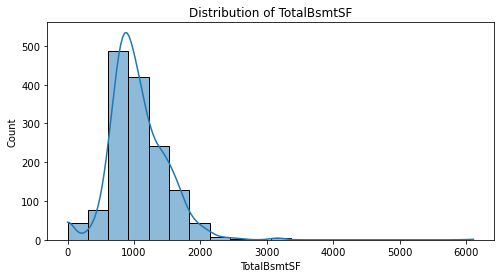

TotalBsmtSF - Skewness: 1.522688086978629, Kurtosis: 13.201041630635025


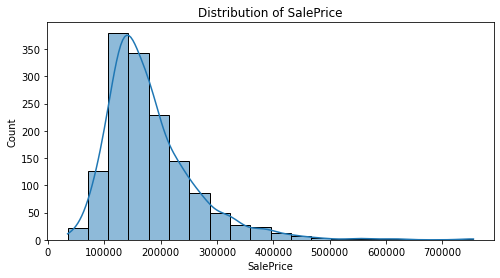

In [9]:
# Plotting histograms
for feature in top_5_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

    # Skewness and Kurtosis
    feature_skewness = skew(df[feature].dropna())
    feature_kurtosis = kurtosis(df[feature].dropna())

    print(f"{feature} - Skewness: {feature_skewness}, Kurtosis: {feature_kurtosis}")

# Plot SalePrice distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['SalePrice'], bins=20, kde=True)
plt.title('Distribution of SalePrice')
plt.show()

#### 1. (d)

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
missing_features = missing_values[missing_values > 0]

# Summary
num_missing_features = len(missing_features)
missing_percentage = (missing_features / len(df)) * 100

print(f"Number of features with missing values: {num_missing_features}")
print("Features with missing values and their percentages:")
print(missing_percentage)

Number of features with missing values: 19
Features with missing values and their percentages:
LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


The House_Price.csv dataset contains several features with missing values. Specifically, 19 features have missing data. The missing data ranges from a small percentage to significant proportions. Most features have a minor amount of missing data (<6%), however 6 features are missing tremendous amounts of data. These features are shown below in asscending order:  
* LotFrontage     17.739726 %
* FireplaceQu     47.260274 %
* Fence           80.753425 %
* Alley           93.767123 %
* MiscFeature     96.301370 %
* PoolQC          99.520548 %

The feature with the lowest percent of missing data is "Electrical", which has only 0.06% missing values. Where as "PoolQC" has 99.52% missing data. Such large amounts of missing data can impact model performance, particularly if the missing values are not random or if key variables are affected. Handling these missing values is crucial before going forward with further analysis or modeling, potentially through imputation, exclusion. 

#### 2. (a)
Business question: "What factors affect the house price?"             
data mining goal: Identify features affecting house price using diffenent analysis methods and feature selection.

Business question: "How do these factors affect the house price?"     
data mining goal: Understand how factors affect house price through visualization and other analysis tools.

#### 2. (b)
Regression:
* Best for understanding how individual features affect house prices through quantifiable predictions and coefficients.
    * Quantitative Impact: Provides insights into how each feature influences the target variable by estimating coefficients or importance scores.
    * Detailed Analysis: Gradient boosting or random forests can quantify the effect of each factor on house prices. Also allows for the assessment of interaction effects between features.
    * Interpretability: Regression models often provide interpretable results, such as the magnitude and direction of feature effects, making it easier to understand and communicate the impact of different factors.

Dimensionality Reduction:
* Useful for exploring and visualizing the relationships between features and house prices, and for handling high-dimensional data efficiently.
    * Feature Exploration: Techniques like Principal Component Analysis (PCA) can help in understanding how multiple features contribute to house prices by reducing the number of dimensions while preserving the variance in the data. This can reveal underlying patterns and relationships that are not immediately apparent in high-dimensional data. 
    * Data Visualization: Dimensionality reduction aids in visualizing complex relationships between features and the target variable, making it easier to identify trends and correlations.
    * Noise Reduction: By reducing the dimensionality, these techniques can help in focusing on the most important features.

#### 3. 

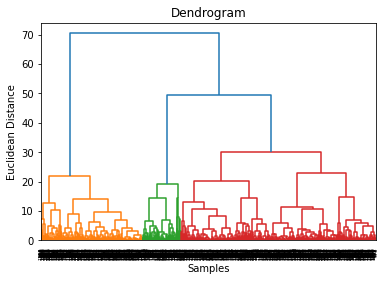

In [11]:
# preparing data
numerical_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']  
X = df[numerical_features]
y = df['SalePrice']

# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# heirarchal clustering
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

# Plot the dendrogram
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

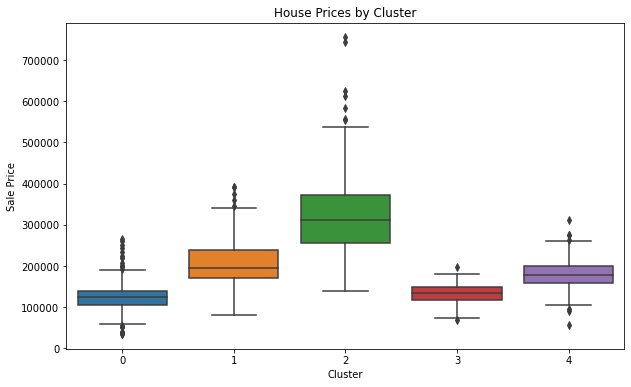

In [12]:
# cluster assignment
num_clusters = 5  # Choose the number of clusters based on dendrogram
clustering = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
df['Cluster'] = clustering.fit_predict(X_scaled)

# Boxplot of SalePrice by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='SalePrice', data=df)
plt.title('House Prices by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Sale Price')
plt.show()

Cluster           0     1     2     3     4
Neighborhood                               
Blmngtn         0.0  16.0   1.0   0.0   0.0
Blueste         0.0   0.0   0.0   0.0   2.0
BrDale         13.0   0.0   0.0   0.0   3.0
BrkSide        38.0   2.0   0.0   5.0  13.0
ClearCr         6.0  16.0   0.0   1.0   5.0
CollgCr        17.0  59.0  18.0  23.0  33.0
Crawfor        23.0  15.0   3.0   1.0   9.0
Edwards        61.0   8.0   3.0  16.0  12.0
Gilbert         0.0  11.0   4.0   3.0  61.0
IDOTRR         29.0   1.0   0.0   6.0   1.0
MeadowV        14.0   1.0   0.0   2.0   0.0
Mitchel        12.0  22.0   2.0  10.0   3.0
NAmes         105.0  49.0   1.0  50.0  20.0
NPkVill         0.0   4.0   0.0   0.0   5.0
NWAmes          0.0  42.0   1.0   4.0  26.0
NoRidge         0.0  12.0  27.0   0.0   2.0
NridgHt         0.0  23.0  51.0   0.0   3.0
OldTown        60.0  11.0   4.0  18.0  20.0
SWISU          20.0   1.0   0.0   0.0   4.0
Sawyer         37.0   6.0   0.0  21.0  10.0
SawyerW         8.0  23.0   5.0 

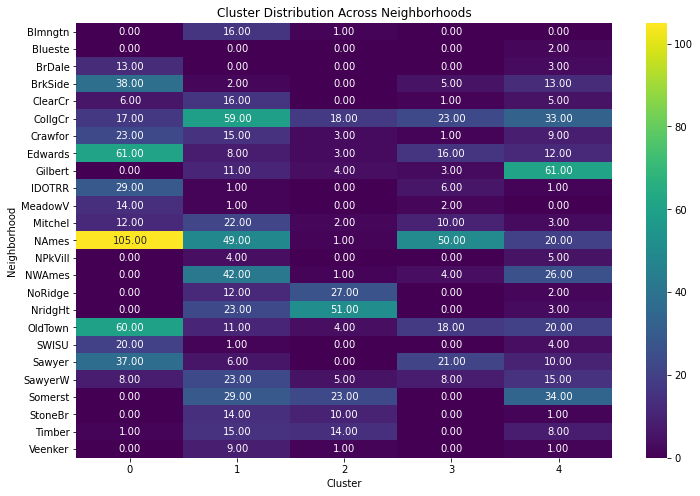

In [14]:
# Compare clusters by neighborhood
neighborhood_clusters = df.groupby(['Neighborhood', 'Cluster']).size().unstack().fillna(0)
print(neighborhood_clusters)

# Visualize cluster distribution across neighborhoods
plt.figure(figsize=(12, 8))
sns.heatmap(neighborhood_clusters, cmap='viridis', annot=True, fmt='.2f')
plt.title('Cluster Distribution Across Neighborhoods')
plt.xlabel('Cluster')
plt.ylabel('Neighborhood')
plt.show()

Question: “Does the house prices vary by nieghbourhood?”.

Answer: Yes, the house prices do infact vary by nieghbourhood. This is shown by the distinct clusters found in the dendrogram, the varying house prices in the boxplots, and the differing distributions of neighborhoods across these clusters in the heatmap.

* Dendrogram: The dendrogram shows the hierarchical structure of the data based on the chosen numerical features. The large distance at which some clusters are merged indicates that there are distinct groups of houses with significantly different characteristics, which might reflect different price ranges.

* Boxplot: This plot illustrates the distribution of house prices within each identified cluster. The variation in median house prices across clusters suggests that the clusters do contain differences in house prices. Since clusters are likely influenced by neighborhood characteristics, this indicates potential variability in house prices by neighborhood.

* Heatmap: The heatmap shows how different neighborhoods are distributed across the clusters. Some neighborhoods are predominantly associated with certain clusters, while others are spread across multiple clusters. For example, the neighborhood with a high concentration in a cluster with higher house prices likely reflects more expensive housing, while a neighborhood with more houses in lower-price clusters may reflect more affordable housing.


### Part 2: Data Preparation and Machine Learning [60 marks]

#### 1.

* Splitting the Data
    * Train-Test Split: Split the dataset into training and test sets with a 70-30 split, ensuring that the target variable (SalePrice) is separated from the features. This split is done before further data preparation to avoid data leaks.
* To handle missing data first we must check for missing values in each column. Once these missing values have been identified then we can use either imputation or column dropping to fix the missing data. 
    * Imputation: For numerical columns with missing values, replace them with the median value of the column. For categorical columns, replace missing values with the mode (most frequent value).
    * Dropping Columns: If certain columns have too many missing values or are not relevant to the analysis (e.g., Alley, PoolQC, Fence, MiscFeature), drop them from the dataset.
* "Encoding categorical data is an essential data preprocessing step for machine learning as most algorithms require numerical input. Techniques like label encoding and one-hot are popular for nominal and ordinal categorical data respectively." -Shipra Saxena (Analytics Vidhya)
    * Label Encoding: For ordinal categorical features where the categories have a meaningful order (e.g. ExterQual for quality ratings).
    * One-Hot Encoding: For nominal categorical features where the categories do not have an inherent order (e.g. Neighborhood, BldgType). This converts categorical variables into binary vectors.
* "Normalizing/Scaling the Data enhances model performance and improves the accuracy of a model. It aids algorithms that rely on distance metrics, such as k-nearest neighbors or support vector machines, by preventing features with larger scales from dominating the learning process." -Sejal Jaiswal (DataCamp)
    * Standardization: Apply standardization (z-score normalization) to numerical features like LotArea, GrLivArea, TotalBsmtSF, 1stFlrSF, GarageArea. This step is important to ensure that all features contribute equally to the model, especially for algorithms that are sensitive to the scale of the input data.
* Removing unnecessary instances is an important step in this process. Outliers can disproportionately affect statistical measures like the mean and standard deviation, leading to biased model training. This can result in the model over/underfitting. removing these values can also boost accuracy through noise reduction and efficincy due to resource optimization/ reduction of dataset scale. 
    * Outlier Detection: Detect and remove outliers in the target variable (SalePrice) using the Interquartile Range (IQR) method.
    * Redundant Instances: Remove duplicates and any rows that contain redundant or extreme values that could skew the analysis.
* Summary:
    * These preprocessing steps ensure that the dataset is clean, all features are in the correct format for modeling, and that no biases are introduced through missing data or scaling issues. The resulting data is ready for building machine learning models. 

In [7]:
df = pd.read_csv('House_Price.csv')

# Split the data into features (X) and target (y)
X = df.drop('SalePrice', axis = 1) 
y = df['SalePrice']

# Perform the train-test split with a 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=309)
x_train_df = pd.DataFrame(X_train, columns=X.columns)
x_test_df = pd.DataFrame(X_test, columns=X.columns)


X_train.head()
# y_train.head()
# X_test.head()
# y_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
447,448,60,RL,NaN,11214,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
756,757,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal
1091,1092,160,FV,24.0,2160,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal
1282,1283,20,RL,61.0,8800,Pave,NaN,IR1,Lvl,AllPub,...,288,0,NaN,NaN,NaN,0,9,2009,WD,Normal
877,878,60,RL,74.0,8834,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal


In [11]:
data_mode = df.mode()
train_mode = x_train_df.mode()
test_mode = x_test_df.mode()

imputer = SimpleImputer(strategy='most_frequent')

x_train_imp = pd.DataFrame(imputer.fit_transform(x_train_df), columns=x_train_df.columns)
x_test_imp = pd.DataFrame(imputer.transform(x_test_df), columns=x_test_df.columns)

categorical_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
                       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
                       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
                       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

numerical_columns = X.drop(columns=categorical_columns)

#encoding catagorical data 
encoded_catagorical_train = pd.get_dummies(x_train_imp, columns=categorical_columns)
encoded_catagorical_test = pd.get_dummies(x_test_imp, columns=categorical_columns)

#eliminating duplicates
train_unique = encoded_catagorical_train.drop_duplicates()
test_unique = encoded_catagorical_test.drop_duplicates()

# normalize the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_unique)
test_scaled = scaler.fit_transform(test_unique)

# finding outliers in the training data
outlier_mask1 = pd.Series(data=False, index=train_unique.index)
for column in train_unique:
    if column in numerical_columns:
        Q1 = train_unique[column].quantile(0.25)
        Q3 = train_unique[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_mask1 |= (train_unique[column] < lower_bound) | (train_unique[column] > upper_bound)

x_train_outliers = train_unique[~outlier_mask1]

# finding outliers in the testing data
outlier_mask2 = pd.Series(data=False, index=test_unique.index)
for column in test_unique:
    if column in numerical_columns:
        Q1 = test_unique[column].quantile(0.25)
        Q3 = test_unique[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_mask2 |= (test_unique[column] < lower_bound) | (test_unique[column] > upper_bound)

x_test_outliers = test_unique[~outlier_mask2]


print(len(x_train_outliers))
print(len(x_test_outliers))

train_data = pd.DataFrame(train_scaled, columns=train_unique.columns)
test_data = pd.DataFrame(test_scaled, columns=test_unique.columns)
train_data.to_csv('processed_data/processed_train_data.csv', index=False)
test_data.to_csv('processed_data/processed_test_data.csv', index=False)

397
170


#### 2.

The two dimensionality reduction techniques I used were Principal Component Analysis (PCA) and Recursive Feature Elimination (RFE). I selected PCA because it simplifies complex datasets by reducing dimensions while retaining as much critical information as possible. RFE, on the other hand, was chosen to identify and preserve the most important features.

Before applying these techniques, I preprocessed the data by handling missing values, encoding categorical variables, scaling, and removing redundant rows. I then performed cross-validation to determine the optimal number of components for PCA and the optimal number of features for RFE, which were found to be 100 and 40, respectively. I used the PCA and RFE libraries from sklearn to fit these models to the data.

The preprocessed data initially had 279 features/components. The PCA model indicated that retaining 100 principal components provides the best balance between reducing dimensionality and preserving the data's variance. This approach effectively captures a significant portion of the variance while simplifying the dataset to 100 columns. In contrast, the RFE model determined that the optimal number of features is 40.

The difference in the number of columns needed by PCA and RFE arises because PCA aims to capture the overall variance in the data, while RFE focuses on retaining only the features most influential to the target variable. For this task, RFE is more suitable as it retains only the most relevant features. Therefore, in the code, I removed the features not selected by RFE.

In [18]:
# pca 
components_to_test = [5, 10, 15, 20, 25, 30, 35, 40, 100, 200]
best_score = -float('inf')
best_components = None
print(train_scaled.shape[1])

# cross validation to find the best num of components to use for pca
for n_components in components_to_test:
    pca = PCA(n_components=n_components)
    train_pca = pca.fit_transform(train_scaled)
    scores = cross_val_score(LinearRegression(), train_pca, y_train, cv = 5)
    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_components = n_components

print('optional number of components: ', best_components)
n_components = best_components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(train_scaled)
X_test_pca = pca.fit_transform(test_scaled)

# recursive feature elim (RFE)
features_to_select = [5, 10, 15, 20, 25, 30, 35, 40, 100]
best_score = -float('inf')
best_features = None

# cross avlidation to find the best num of features to use for rfe
for n_features in features_to_select:
    rfe = RFE(LinearRegression(), n_features_to_select=n_features)
    train_rfe = rfe.fit_transform(train_scaled, y_train)
    scores = cross_val_score(LinearRegression(), train_rfe, y_train, cv=5)
    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_features = n_features

print('optional number of features: ', best_features)
n_features_to_select = best_features
linReg = LinearRegression()
rfe = RFE(linReg, n_features_to_select=n_features_to_select)
X_train_rfe = rfe.fit_transform(train_scaled, y_train)
X_test_rfe = rfe.fit_transform(test_scaled, y_test)

selected_features_mask = rfe.support_
n_selected_features = np.sum(selected_features_mask)
print('Number of selected features: ', n_selected_features)

selected_features_indicies = np.where(selected_features_mask)[0]

seleected_feature_names = [train_data.columns[i] for i in selected_features_indicies]
print('Most influential features to sale price as determined by RFE', seleected_feature_names)

selected_train_features_df = test_data.iloc[:, selected_features_indicies]
selected_test_features_df = train_data.iloc[:, selected_features_indicies]

279
optional number of components:  100
optional number of features:  40
Number of selected features:  40
Most influential features to sale price as determined by RFE ['LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Flat', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_TA', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'PavedDrive_Y', 'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd', 'Fence_GdPrv']
